In [1]:
#Adrian del Pozo Hernandez
#Ines Primo Lopez

import numpy as np
import sounddevice as sd
import matplotlib.pyplot as plt

# gráficos en el notebook
%matplotlib inline
SRATE = 44100 # Sample rate, para todo el programa

In [2]:
def osc(freq, dur=1, amp=1, phase=0):
    
    ns = np.arange(SRATE * dur)
    a = np.sin(((ns * np.pi * 2 * freq) /SRATE) + phase)

    return a * amp

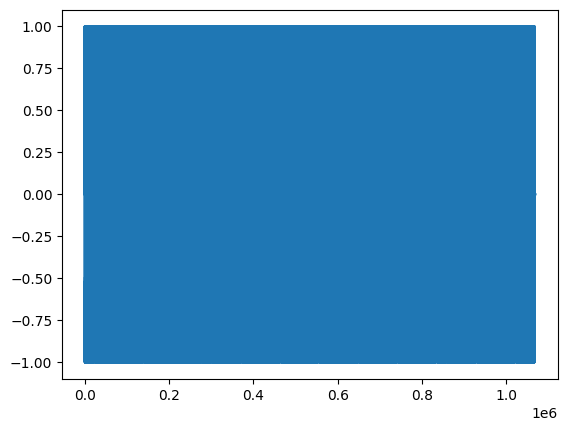

In [5]:
#teclas de piano ampliado
teclas = "CDEFGABHIJKLcdefgabhijkl"

#frecuencias ampliadas
frecs = [523.251, 587.33, 659.255, 698.456, 783.991, 880, 987.767, 554.365, 622.254, 739.989, 830.609, 932.328]

#Se añaden los agudos en la tabla de frecuencias
ext = [f * 2 for f in frecs]
tablafrecs = frecs + ext

#Partitura del cumpleaños feliz
partitura = np.array([['G', 0.5], ['G', 0.5], ['A', 1], ['G', 1], ['c', 1], ['B', 2],
                      ['G', 0.5], ['G', 0.5], ['A', 1], ['G', 1], ['d', 1], ['c', 2],
                      ['G', 0.5], ['G', 0.5], ['g', 1], ['e', 1], ['c', 1], ['B', 1], ['A', 1],
                      ['f', 0.5], ['f', 0.5], ['e', 1], ['c', 1], ['d', 1], ['c', 1]])

#Se traduce una nota a una frecuencia
def NotaFrecuencia(nombre, dur=1, amp=1, phase = 0):
    indx = teclas.index(nombre)
    return tablafrecs[indx]

#se añade una nota a una partitura
def AddNota (partitura, nota, duracion):
    aux = osc(NotaFrecuencia(nota), duracion)
    sil = osc(0, 0.05)
    return np.concatenate((partitura, aux, sil), axis=None)

#te crea una partitura dada una tabla de notas y duraciones
def CrearPartitura(tabla):
    sol = np.array([])

    for i in tabla:

       sol = AddNota(sol, i[0], i[1].astype(float))

    return sol

sol = CrearPartitura(partitura)

plt.plot(sol)

sd.play(sol)

sd.wait()